In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import torch
from torch import nn

In [122]:
data = pd.read_csv('us-counties.csv')
data = data.groupby(['date'],as_index = False).agg({'cases':sum})
data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


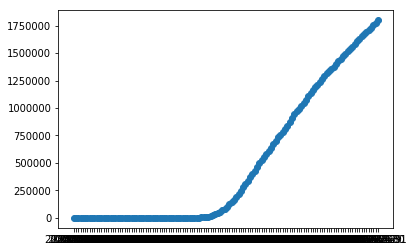

In [123]:
x = data['date']
y = data['cases']
x = x.to_numpy()
y = y.to_numpy()
plt.scatter(x,y)
plt.show()

In [124]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


In [125]:
data = data[['year','month','day','cases']]


In [126]:
data.head()

,year,month,day,cases
0,2020,1,21,1
1,2020,1,22,1
2,2020,1,23,1
3,2020,1,24,2
4,2020,1,25,3


In [127]:
x = data[['year','month','day']]
y = data[['cases']]
x = x.to_numpy()
y = y.to_numpy()

In [128]:
print(x.shape,y.shape)

(132, 3) (132, 1)


In [129]:
x

array([[2020,    1,   21],
       [2020,    1,   22],
       [2020,    1,   23],
       [2020,    1,   24],
       [2020,    1,   25],
       [2020,    1,   26],
       [2020,    1,   27],
       [2020,    1,   28],
       [2020,    1,   29],
       [2020,    1,   30],
       [2020,    1,   31],
       [2020,    2,    1],
       [2020,    2,    2],
       [2020,    2,    3],
       [2020,    2,    4],
       [2020,    2,    5],
       [2020,    2,    6],
       [2020,    2,    7],
       [2020,    2,    8],
       [2020,    2,    9],
       [2020,    2,   10],
       [2020,    2,   11],
       [2020,    2,   12],
       [2020,    2,   13],
       [2020,    2,   14],
       [2020,    2,   15],
       [2020,    2,   16],
       [2020,    2,   17],
       [2020,    2,   18],
       [2020,    2,   19],
       [2020,    2,   20],
       [2020,    2,   21],
       [2020,    2,   22],
       [2020,    2,   23],
       [2020,    2,   24],
       [2020,    2,   25],
       [2020,    2,   26],
 

In [130]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_data = sc_x.fit_transform(x)
sc_y = StandardScaler()
y_data = sc_y.fit_transform(y)

D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
# AFTER SCALING THE DATA
x_data

array([[ 0.        , -1.81358161,  0.50573214],
       [ 0.        , -1.81358161,  0.61811706],
       [ 0.        , -1.81358161,  0.73050198],
       [ 0.        , -1.81358161,  0.8428869 ],
       [ 0.        , -1.81358161,  0.95527182],
       [ 0.        , -1.81358161,  1.06765674],
       [ 0.        , -1.81358161,  1.18004166],
       [ 0.        , -1.81358161,  1.29242658],
       [ 0.        , -1.81358161,  1.4048115 ],
       [ 0.        , -1.81358161,  1.51719642],
       [ 0.        , -1.81358161,  1.62958134],
       [ 0.        , -1.02868727, -1.74196626],
       [ 0.        , -1.02868727, -1.62958134],
       [ 0.        , -1.02868727, -1.51719642],
       [ 0.        , -1.02868727, -1.4048115 ],
       [ 0.        , -1.02868727, -1.29242658],
       [ 0.        , -1.02868727, -1.18004166],
       [ 0.        , -1.02868727, -1.06765674],
       [ 0.        , -1.02868727, -0.95527182],
       [ 0.        , -1.02868727, -0.8428869 ],
       [ 0.        , -1.02868727, -0.730

In [137]:
y_data

array([[-0.81691168],
       [-0.81691168],
       [-0.81691168],
       [-0.81691005],
       [-0.81690842],
       [-0.81690516],
       [-0.81690516],
       [-0.81690516],
       [-0.81690516],
       [-0.81690353],
       [-0.8169019 ],
       [-0.81690027],
       [-0.81689538],
       [-0.81689538],
       [-0.81689538],
       [-0.81689375],
       [-0.81689375],
       [-0.81689375],
       [-0.81689375],
       [-0.81689375],
       [-0.81689212],
       [-0.81689212],
       [-0.81689048],
       [-0.81688885],
       [-0.81688885],
       [-0.81688885],
       [-0.81688885],
       [-0.81687255],
       [-0.81687255],
       [-0.81687255],
       [-0.81686929],
       [-0.8168644 ],
       [-0.8168644 ],
       [-0.8168644 ],
       [-0.8168432 ],
       [-0.81683994],
       [-0.81681549],
       [-0.81681549],
       [-0.81680734],
       [-0.81679918],
       [-0.81676984],
       [-0.81674375],
       [-0.81670951],
       [-0.81665082],
       [-0.81654158],
       [-0

In [138]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden


In [205]:
# TESTING THE RNN MODEL AND CHECKING THE SHAPES OF THE DATA
test_rnn = RNN(input_size=3, output_size=1, hidden_dim=10, n_layers=2)


test_input = torch.Tensor(x_data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())
# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
test_out = torch.Tensor(y_data)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 132, 3])
Output size:  torch.Size([132, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [206]:
#INITIALIZING THE HIDDEN STATE
test_h

tensor([[[ 0.5399,  0.6123,  0.5069, -0.7492,  0.4211, -0.2430, -0.2796,
          -0.1471,  0.3352, -0.8030]],

        [[-0.1839, -0.4305, -0.4575, -0.2711, -0.3956, -0.0688, -0.5681,
          -0.0211,  0.0869, -0.5663]]], grad_fn=<StackBackward>)

In [210]:
# defining the hyperparameters
input_size=3
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01) 

RNN(
  (rnn): RNN(3, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [211]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    Y = data['cases']
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 

        x = x_data[:-1]
        y = y_data[1:]
        
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(Y,'r',linewidth=1,label='cases_real')
            plt.plot(sc_y.inverse_transform(prediction.data.numpy()), 'b--',linewidth=2,label='cases_predictons') # predictions
            plt.legend()
            plt.show()
    
    return rnn


Loss:  0.944398820400238


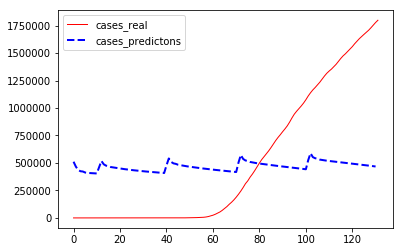

Loss:  0.08162795007228851


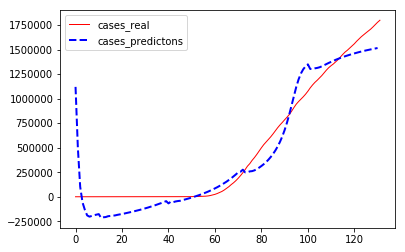

Loss:  0.04738888517022133


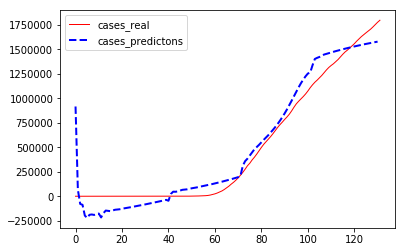

Loss:  0.03066916950047016


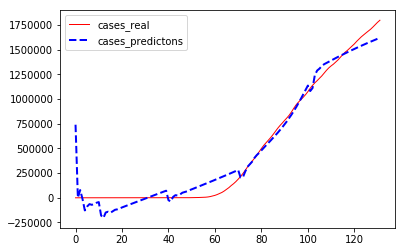

Loss:  0.02733958140015602


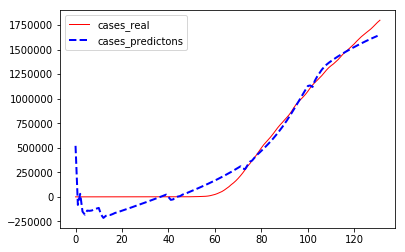

Loss:  0.01893324963748455


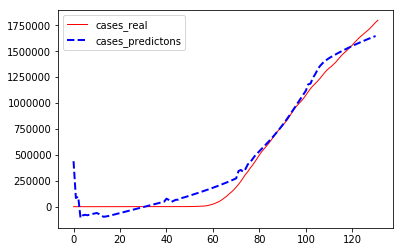

In [212]:
# train the rnn and monitor results
n_steps = 80
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)